In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data/data.csv')
genre_data = pd.read_csv('data/data_by_genres.csv')
year_data = pd.read_csv('data/data_by_year.csv')
artist_data = pd.read_csv('data/data_by_artist.csv')
data_w_genre = pd.read_csv('data/data_w_genres.csv')
tracks_2022 = pd.read_csv('data/track_data.csv')
track_features_2022 = pd.read_csv('data/track_features_data.csv')

In [3]:
tracks_2022.head(2)

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,3TVXtAsR1Inumwj472S9r4,97,"['canadian hip hop', 'canadian pop', 'hip hop'...",69564318
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,['pop'],63584715


In [4]:
track_features_2022.head(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.561,0.520,-9.342,0.2440,0.0503,0.000002,0.355,0.424,153.150,1bDbXMyjaUIooNwFE9wn0N,239360,3
1,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.142,0.533,97.008,0V3wPSX9ygBnCm8psDIegu,200690,4


In [5]:
track_features_2022.rename(columns = {'id':'track_id'}, inplace = True)
merged_tracks_2022 = pd.merge(tracks_2022, track_features_2022, how="inner", on="track_id")
merged_tracks_2022.head(2)

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,3TVXtAsR1Inumwj472S9r4,97,"['canadian hip hop', 'canadian pop', 'hip hop'...",69564318,0.561,0.520,-9.342,0.2440,0.0503,0.000002,0.355,0.424,153.150,239360,3
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,['pop'],63584715,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.142,0.533,97.008,200690,4


In [51]:
merged_tracks_2022.head()


,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,3TVXtAsR1Inumwj472S9r4,97,"['canadian hip hop', 'canadian pop', 'hip hop'...",69564318,0.561,0.520,-9.342,0.2440,0.0503,0.000002,0.3550,0.4240,153.150,239360,3
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,['pop'],63584715,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.1420,0.5330,97.008,200690,4
2,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,88,"['dance pop', 'pop', 'uk pop']",20949616,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.2380,131.121,156943,4
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,80,['bedroom pop'],382572,0.571,0.544,-10.613,0.0299,0.4530,0.008050,0.3220,0.2160,132.052,132631,4
4,Lil Uzi Vert,Just Wanna Rock,4FyesJzVpA39hbYvcseO2d,90,4O15NlyKLIASxsJ0PrXPfz,86,"['melodic rap', 'philly rap', 'rap', 'trap']",14141881,0.486,0.545,-7.924,0.0336,0.0652,0.004740,0.0642,0.0385,150.187,123891,4


# Bar Graph

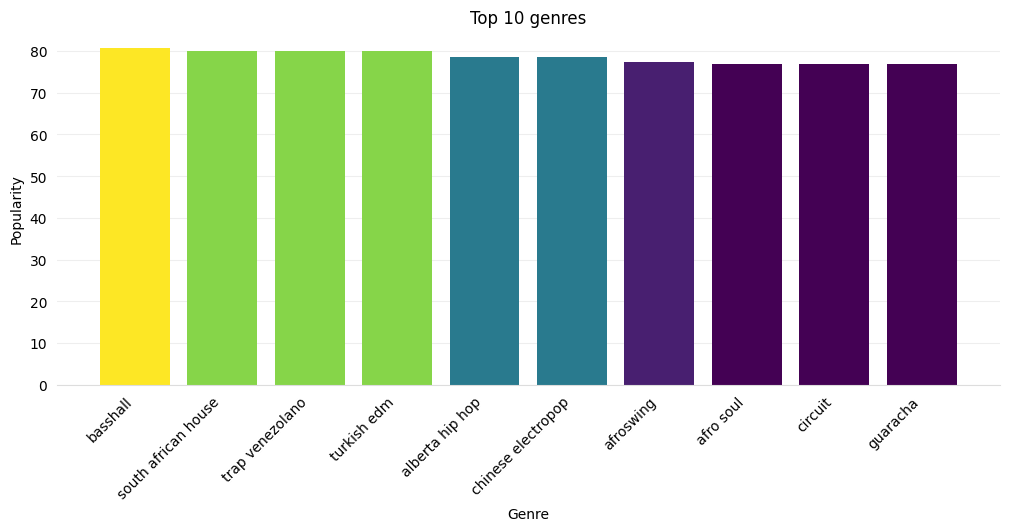

In [16]:
top10_genres = genre_data.nlargest(10, 'popularity')

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45, ha='right')
ax.bar(x = top10_genres['genres'], height = top10_genres['popularity'], color=my_cmap(rescale(top10_genres['popularity'])))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

fig.tight_layout()
plt.title("Top 10 genres")
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()


<BarContainer object of 10 artists>

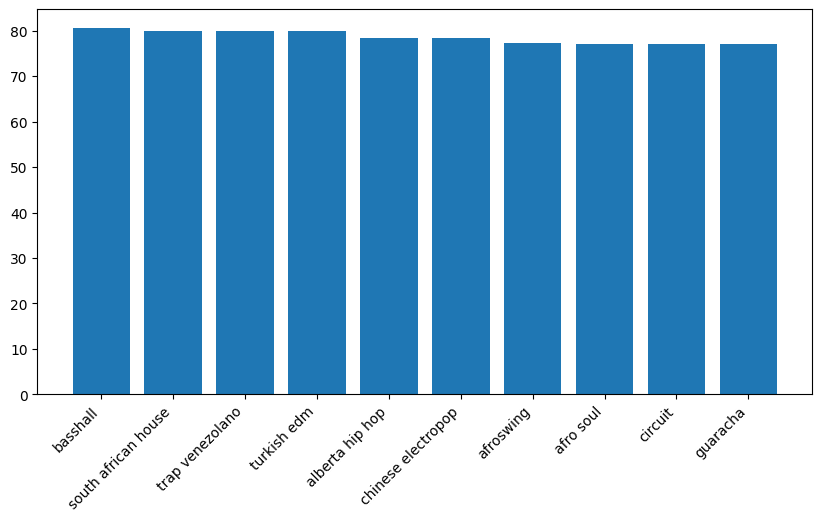

In [9]:
top10_genres = genre_data.nlargest(10, 'popularity')
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45, ha='right')
ax.bar(x = top10_genres['genres'], height = top10_genres['popularity'])

# Pie Chart

<AxesSubplot: title={'center': 'Key values'}>

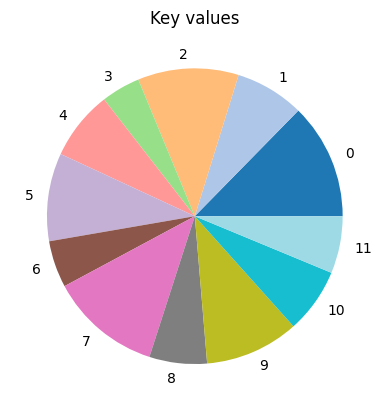

In [5]:
fig, ax = plt.subplots()
ax.set_title('Key values')
data.groupby(['key']).size().plot(kind='pie', colormap='tab20')

# Scatter Plot

Text(0, 0.5, 'Year')

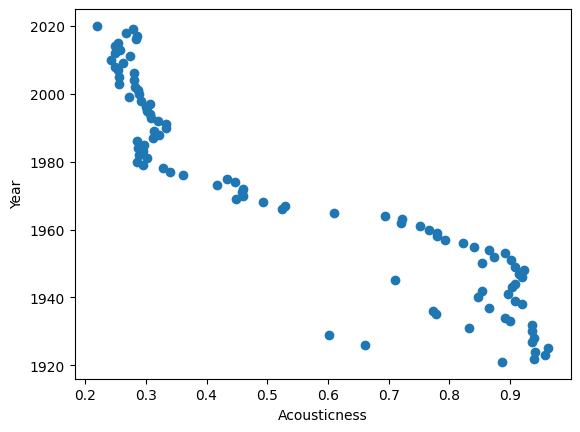

In [13]:
fig, ax = plt.subplots()
ax.scatter(year_data['acousticness'], year_data['year'])

ax.set_xlabel('Acousticness')
ax.set_ylabel('Year')

# Line plot

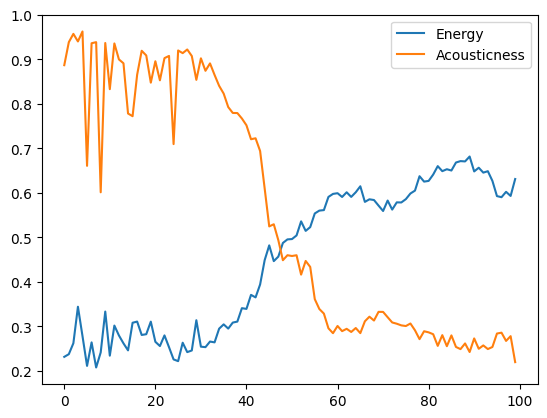

In [59]:
fig, ax = plt.subplots()
ax.plot(year_data['energy'], label='Energy')
ax.plot(year_data['acousticness'], label = 'Acousticness')
ax.legend()


# Histogram

Text(0.5, 1.0, 'Liveness')

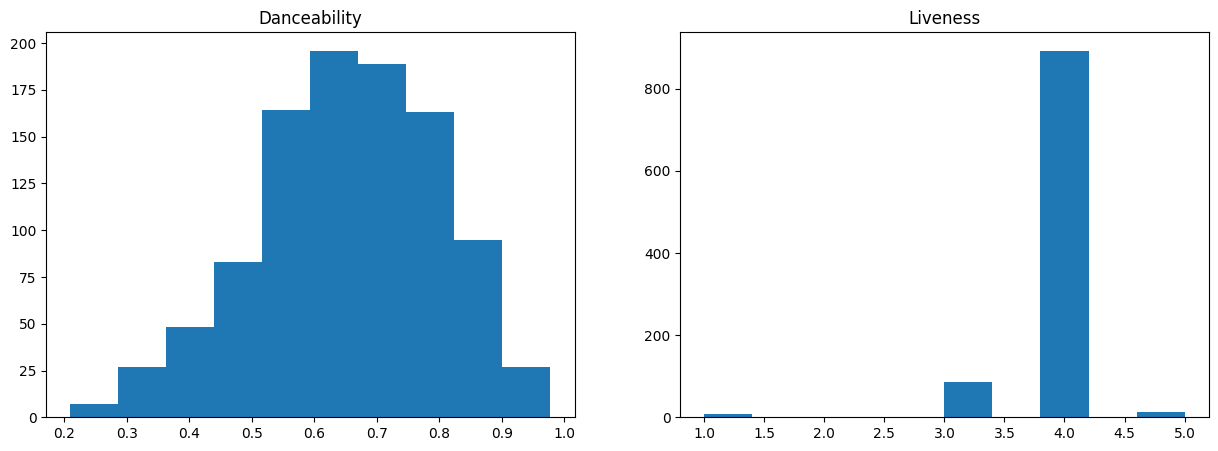

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(track_features_2022['danceability'])
ax[0].set_title('Danceability')
ax[1].hist(track_features_2022['liveness'])
ax[1].set_title('Liveness')


In [70]:
top10_songs = merged_tracks_2022.nlargest(10, 'track_popularity')
top10_songs

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,88,"['dance pop', 'pop', 'uk pop']",20949616,0.714,0.472,-7.375,0.0864,0.01300,0.000005,0.2660,0.238,131.121,156943,4
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,['pop'],63584715,0.637,0.643,-6.571,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690,4
17,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,97,1Cs0zKBU1kc0i8ypK3B9ai,89,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",25113344,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4
49,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,97,0tmwSHipWxN12fsoLcFU3B,85,"['colombian pop', 'reggaeton', 'reggaeton colo...",10908750,0.835,0.679,-5.329,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638,4
90,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,97,716NhGYqD1jl2wI1Qkgq36,85,"['argentine hip hop', 'pop venezolano', 'trap ...",8036546,0.621,0.782,-5.548,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4
0,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,3TVXtAsR1Inumwj472S9r4,97,"['canadian hip hop', 'canadian pop', 'hip hop'...",69564318,0.561,0.520,-9.342,0.2440,0.05030,0.000002,0.3550,0.424,153.150,239360,3
11,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,96,4q3ewBCX7sLwd24euuV69X,98,"['reggaeton', 'trap latino']",60363645,0.911,0.712,-5.105,0.0817,0.09010,0.000027,0.0933,0.425,92.005,178567,4
8,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,95,4q3ewBCX7sLwd24euuV69X,98,"['reggaeton', 'trap latino']",60363645,0.650,0.715,-5.198,0.2530,0.09930,0.000291,0.1260,0.187,106.672,243717,4
18,OneRepublic,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,95,5Pwc4xIPtQLFEnJriah9YJ,84,"['piano rock', 'pop']",14660996,0.704,0.797,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4
24,Meghan Trainor,Made You Look,0QHEIqNKsMoOY5urbzN48u,94,6JL8zeS1NmiOftqZTRgdTz,83,"['dance pop', 'hip pop', 'pop', 'post-teen pop']",12300049,0.838,0.525,-3.562,0.0665,0.34500,0.000002,0.0771,0.884,144.981,134256,4


In [1]:
import pandas as pd
import numpy as np
data = np.array(['A','B','C','D'])
S1 = pd.Series(data)
S2 = pd.Series(data,index=[100,101,102,103])
print(S1)
print(S2)

0    A
1    B
2    C
3    D
dtype: object
100    A
101    B
102    C
103    D
dtype: object
